# Classification Project (Supervised Machine Learning)

### Target Feature - Machine Failure 

1. Perfom Algo Evaluation
2. Evaluate model by confusion matrix, classifcation report
3. ROC AUC Score

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

## Step 1: Read the data 

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


## Step 2: Perform Basic Data Quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
m = df.isna().sum()
m[m>0]

Series([], dtype: int64)

In [5]:
df.duplicated().sum()

0

## Step 3: Separate X and Y(Machine Failure)

In [6]:
X = df.drop(columns=['id', 'Product ID', 'Machine failure'])
Y = df[['Machine failure']]

In [7]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [8]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


## Step 4: Separate Cat and Con features for X

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Type']

In [11]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

## Step 5: Data Preprocessing Pipeline for X

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [14]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [15]:
pre = ColumnTransformer([('num', num_pipe, con),
                           ('cat', cat_pipe, cat)]).set_output(transform='pandas')
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [16]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


## Step 6: Apply Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [18]:
xtrain.shape

(95500, 13)

In [19]:
xtest.shape

(40929, 13)

## Step 7: Algorithm Evaluation

#### 1. Target feature is Categorical feature so Classifier modls used
#### 2. Data points >2000 so KNN and SVM models not included

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### 7(i) Create a dictionary with base models for evaluation

In [21]:
dct = {'Logistic':LogisticRegression(),
       'Decision Tree':DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boosting':GradientBoostingClassifier()}

### 7(ii) Create a funtion to calculate Train & Test data scores and cross validation scores

In [22]:
from sklearn.metrics import f1_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score
train_res = []
test_res = []
train_fcv = []
train_rcv = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)

    # Predict results for Train & Test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Get f1_score for Train & Test
    f1_train = f1_score(ytrain, ypred_train, average='macro')
    f1_test = f1_score(ytest, ypred_test, average='macro')

    # Cross validate the scores
    scoresf = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scoresf.mean()
    scoresr = cross_val_score(model, xtrain, ytrain, cv=5, scoring='roc_auc')
    auc_cv = scoresr.mean()

    # Append above results in list
    train_res.append(f1_train)
    test_res.append(f1_test)
    train_fcv.append(f1_cv)
    train_rcv.append(auc_cv)

### 7(iii) Create a dataframe to show scores of each model

In [23]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boosting'])

In [24]:
res = {'Model Name':list(dct.keys()),
       'Train':train_res,
       'Test':test_res,
       'Train_f1_CV':train_fcv,
       'Train_auc_CV':train_rcv}

In [25]:
df_res = pd.DataFrame(res)
df_res

,Model Name,Train,Test,Train_f1_CV,Train_auc_CV
0,Logistic,0.931916,0.927196,0.931864,0.936217
1,Decision Tree,0.997476,0.862601,0.872647,0.890634
2,Random Forest,0.997308,0.927581,0.928765,0.940293
3,Gradient Boosting,0.938506,0.929515,0.929621,0.959681


In [26]:
# Sorting the results in Train_auc_CV in descending order

df_res.sort_values(by='Train_auc_CV', ascending=False)

,Model Name,Train,Test,Train_f1_CV,Train_auc_CV
3,Gradient Boosting,0.938506,0.929515,0.929621,0.959681
2,Random Forest,0.997308,0.927581,0.928765,0.940293
0,Logistic,0.931916,0.927196,0.931864,0.936217
1,Decision Tree,0.997476,0.862601,0.872647,0.890634


### Conclusion on above: Train_auc_CV score is highest for Gradient Boosting. Hence, choosing Gradient Boosting for final prediction as it is good model

Note: Overall scores for Gradient Boosting are better than other models scores

### 7(iv) Fit Gradient Boosting model

In [27]:
best_model = GradientBoostingClassifier(learning_rate=0.1,
                                        n_estimators=1,
                                        max_depth=1,
                                        min_samples_split=5,
                                        min_samples_leaf=5)
best_model.fit(xtrain, ytrain)

GradientBoostingClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                           n_estimators=1)

In [28]:
best_model.score(xtrain, ytrain)

0.9893298429319372

In [29]:
best_model.score(xtest, ytest)

0.989322973930465

## Step 8: Hperparamter Tuning

In [30]:
params = {'learning_rate':[0.01, 0.1, 0.15, 0.2],
          'n_estimators':[10, 20, 50, 100, 200],
          'max_depth':[2, 3, 4, 5],
          'min_samples_split':[5, 6, 7, 8, 9]}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 20, 50, 100, 200]},
                   scoring='f1_macro')

In [32]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 7,
 'max_depth': 3,
 'learning_rate': 0.01}

In [33]:
rscv.best_score_

0.9313308045158457

In [34]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.01, min_samples_split=7,
                           n_estimators=200)

### 8(i) Evaluate Gradient Boosting Classifier Model

In [35]:
best_gbc.score(xtrain, ytrain)

0.9962408376963351

In [36]:
best_gbc.score(xtest, ytest)

0.9961152239243568

### 8(ii) Predict the results for Train & Test data for Y 

In [37]:
ypred_train1 = best_gbc.predict(xtrain)
ypred_test1 = best_gbc.predict(xtest)

In [38]:
ypred_train1[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [39]:
ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [40]:
ypred_test1[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [41]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### 8(iii) Plot Confusion Matrix for Test data

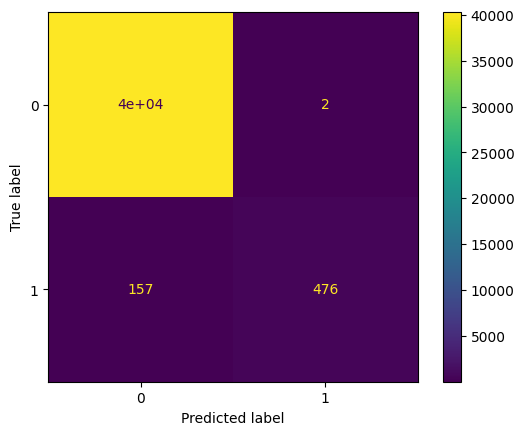

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test1)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()

### 8(iv) Print Classification Report for Test data

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40296
           1       1.00      0.75      0.86       633

    accuracy                           1.00     40929
   macro avg       1.00      0.88      0.93     40929
weighted avg       1.00      1.00      1.00     40929



### CONCLUSION - Test f1score is 0.93  and Cross Validated score is 0.9311

## Step 9: Predict Out of Sample data

In [44]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


### 9(i) Apply pre.transform on xnew

In [45]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### 9(ii) Get predictions 

In [46]:
preds = best_gbc.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 9(iii) Get probabilty of the predictions

In [47]:
probs = best_gbc.predict_proba(xnew_pre)
probs[0:5]

array([[0.99366485, 0.00633515],
       [0.99366485, 0.00633515],
       [0.99366485, 0.00633515],
       [0.99366485, 0.00633515],
       [0.99366485, 0.00633515]])

In [48]:
best_gbc.classes_

array([0, 1], dtype=int64)

In [49]:
prob_mf = probs[:,1]
prob_mf[0:5]

array([0.00633515, 0.00633515, 0.00633515, 0.00633515, 0.00633515])

## Step 10: Save above results to Dataframe

In [50]:
df_results = xnew[['id']]
df_results.head()

,id
0,136429
1,136430
2,136431
3,136432
4,136433


In [51]:
df_results['Failure_Prediction'] = preds
df_results['Failure_Probability'] = prob_mf

In [52]:
df_results.head()

,id,Failure_Prediction,Failure_Probability
0,136429,0,0.006335
1,136430,0,0.006335
2,136431,0,0.006335
3,136432,0,0.006335
4,136433,0,0.006335


### 10(i) Plot predicted values Bar Chart

In [53]:
df_results['Failure_Prediction'].value_counts()

Failure_Prediction
0    89854
1     1100
Name: count, dtype: int64

<Axes: xlabel='Failure_Prediction'>

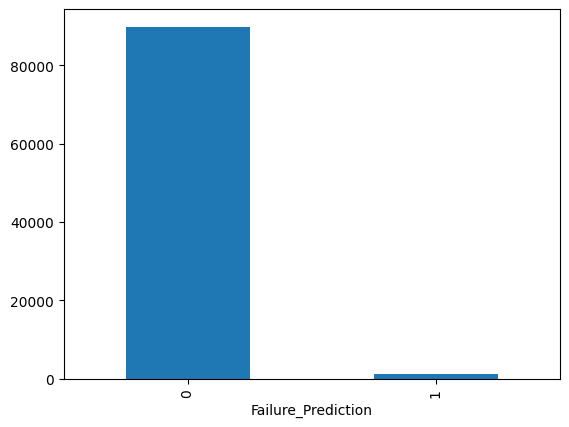

In [54]:
df_results['Failure_Prediction'].value_counts().plot(kind='bar')

## Step 11 - Save above df to csv

In [55]:
df_results.to_csv('Results_DJ.csv', index=False)